# HDDT Quakers (tables) #

## An analysis of 593 Quakers, their relationships and CEDA memberships ##

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))
import numpy as np
import csv
import seaborn as sns

In [62]:
quakers = pd.read_csv ('vw_1_quakers.csv')
quakers['birth_year'] = quakers['death_year'].fillna(0).astype(np.int64)
quakers['death_year'] = quakers['death_year'].fillna(0).astype(np.int64)

quaker_relationships = pd.read_csv ('vw_5_person1_person2.csv')
quaker_distant = pd.read_csv ('vw_5_quaker_relationships_1.csv')
quaker_close = pd.read_csv ('vw_5_quaker_relationships_2.csv')
quaker_immediate = pd.read_csv ('vw_5_quaker_relationships_3.csv')

quaker_ceda = pd.read_csv('vw_4_ceda_membership_quakers.csv')
quaker_aps = pd.read_csv ('vw_4_ceda_membership_quakers_aps.csv')
quaker_esl = pd.read_csv('vw_4_ceda_membership_quakers_esl.csv')
quaker_asl = pd.read_csv('vw_4_ceda_membership_quakers_asl.csv')
quaker_ai = pd.read_csv('vw_4_ceda_membership_quakers_ai.csv')
quaker_qca = pd.read_csv('vw_4_ceda_membership_quakers_qca.csv')
quaker_hod = pd.read_csv('vw_4_ceda_membership_quakers_hod.csv')


# Quakers are well connected by familial relationships #

<img src="quaker_relationships.png">

# Quakers occupy roughly 50% of the APS (and 100% of the QCA) #

<img src="quaker_bigraph.png">

# List out all Quakers in the database #

## Note - 'confirmed' 1 = positive identification, 0 = probable identification ##

In [8]:

quakers

,id,Name,gender_id,birth_year,death_year,data_source_id,religion_id
0,23,William Aldam,1.0,1890,1890,1,1
1,27,S Stafford Allen,1.0,1870,1870,1,1
2,80,Edward Backhouse,1.0,1879,1879,1,1
3,81,James (1) Backhouse,1.0,1869,1869,1,1
4,151,James Bell,1.0,1872,1872,1,1
...,...,...,...,...,...,...,...
587,2876,Joshua Wilson,NaN,0,0,3,1
588,2877,F Woodhead,NaN,0,0,3,1
589,2878,W Woolston,NaN,0,0,3,1
590,2879,Francis Wright,NaN,0,0,3,1


# List out all Quaker Relationships by type #

## Note 'relationship type' 3 = immediate relation, 2 = close relation, 3 = distant relation ##

In [9]:
quaker_relationships

,Source,Target,relationship_type_id
0,William Aldam,x Fox,1
1,William Jun Aldam,x Fox,1
2,Frederick Alexander,R D Alexander,1
3,G W Alexander,R D Alexander,1
4,Henry Alexander,R D Alexander,1
...,...,...,...
2081,Alfred Waterhouse,R Waterhouse,3
2082,Mary Waterhouse,Paul Bevan,3
2083,Lucy Westcombe,Thomas Westcombe,3
2084,Benjamin Wheeler,Samuel Wheeler,3


# Pie chart of all Quaker relationships #

## Note e.g. 3 contains a few Quakers with many relationships, 1 contains many Quakers with few relationships ##

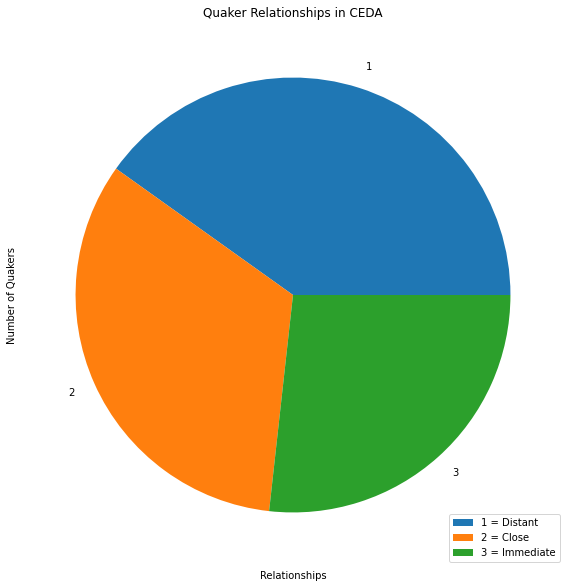

In [10]:
quaker_relationships.groupby('relationship_type_id')['Source'].nunique().plot(kind='pie')
plt.title ("Quaker Relationships in CEDA")
plt.xlabel ("Relationships")
plt.ylabel ("Number of Quakers")
plt.legend(["1 = Distant", "2 = Close", "3 = Immediate"], loc ="lower right")
plt.show()

In [11]:
quaker_immediate 

,Source,Target,relationship_type_id
0,Arthur Albright,John M Albright,3
1,Arthur Albright,Rachel Albright,3
2,Arthur Albright,William Albright,3
3,Rachel Albright,John M Albright,3
4,Rachel Albright,William Albright,3
...,...,...,...
241,Alfred Waterhouse,R Waterhouse,3
242,Mary Waterhouse,Paul Bevan,3
243,Lucy Westcombe,Thomas Westcombe,3
244,Benjamin Wheeler,Samuel Wheeler,3


In [12]:
quaker_close

,Source,Target,relationship_type_id
0,R D Alexander,Christopher Bowley,2
1,R D Alexander,Robert Charleton,2
2,R D Alexander,Frederick H Fox,2
3,R D Alexander,Thomas Maw,2
4,R D Alexander,William Norton,2
...,...,...,...
514,W Whiting,John Whiting,2
515,Isaac Wilson,S Braithwaite,2
516,Isaac Wilson,John Jowett,2
517,Isaac Wilson,John E Wilson,2


In [13]:
quaker_distant

,Source,Target,relationship_type_id
0,William Aldam,x Fox,1
1,William Jun Aldam,x Fox,1
2,Frederick Alexander,R D Alexander,1
3,G W Alexander,R D Alexander,1
4,Henry Alexander,R D Alexander,1
...,...,...,...
1316,William Wilson,Barnard Dickinson,1
1317,William Wilson,Frederick Fryer,1
1318,William Wilson,Benjamin Jowett (2),1
1319,William Wilson,John Pease,1


# List out all Quaker CEDA memberships #

In [15]:
quaker_ceda

,person_id,Name,religion_id,religion_name,ceda_id,ceda_name,person_ceda_first_year,person_ceda_last_year
0,2233,William Spicer Wood,1,Quaker,2,APS,1864.0,1867.0
1,2233,William Spicer Wood,1,Quaker,4,ASL,1863.0,1871.0
2,2233,William Spicer Wood,1,Quaker,6,AI,1863.0,1871.0
3,2211,William Wilson,1,Quaker,2,APS,1838.0,1865.0
4,2211,William Wilson,1,Quaker,4,ASL,1865.0,1866.0
...,...,...,...,...,...,...,...,...
690,2876,Joshua Wilson,1,Quaker,2,APS,1860.0,1860.0
691,2877,F Woodhead,1,Quaker,2,APS,1861.0,1862.0
692,2878,W Woolston,1,Quaker,2,APS,1861.0,1861.0
693,2879,Francis Wright,1,Quaker,2,APS,1838.0,1838.0


# Pie chart Quaker CEDA memberships #

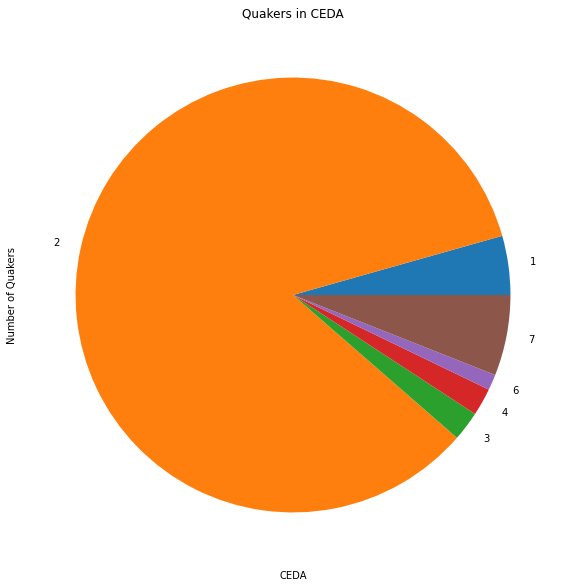

In [18]:
quaker_ceda.groupby('ceda_id')['Name'].nunique().plot(kind='pie')
plt.title ("Quakers in CEDA")
plt.xlabel ("CEDA")
plt.ylabel ("Number of Quakers")
plt.show()

# Show Quaker 'joiners' and 'leavers' of the CEDA #

## (Predominantly the APS) ##

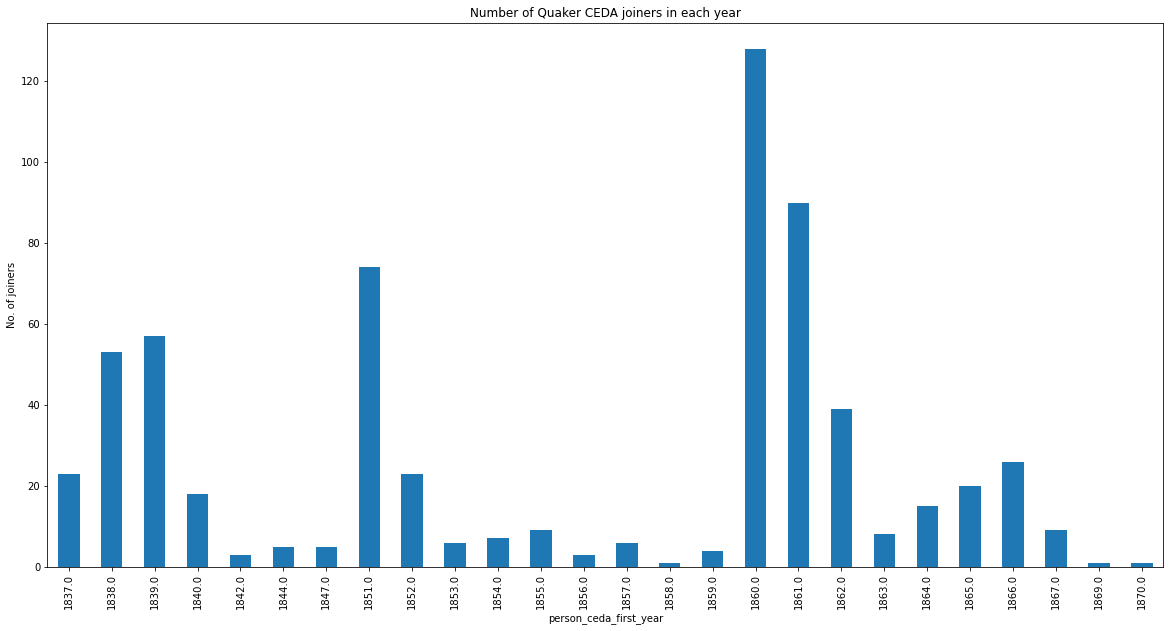

In [20]:
quaker_ceda.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker CEDA joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

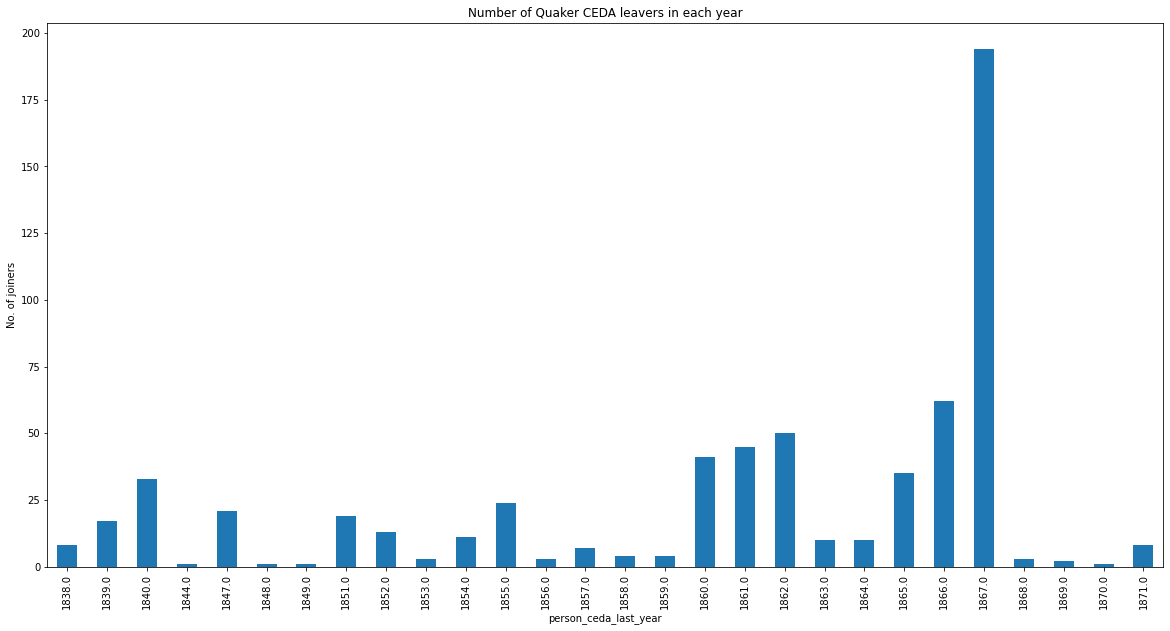

In [21]:
quaker_ceda.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("Number of Quaker CEDA leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# Show the Quaker members of the QCA #

In [55]:
quaker_qca

,person_id,Name,religion_id,religion_name,ceda_id,ceda_name,person_ceda_first_year,person_ceda_last_year
0,967,Thomas (1) Hodgkin,1,Quaker,1,QCA,1839,1847
1,2511,James Bowden,1,Quaker,1,QCA,1842,1847
2,2512,William Nash,1,Quaker,1,QCA,1842,1847
3,2513,Joseph Sturge,1,Quaker,1,QCA,1842,1847
4,2514,William Jun Grimshaw,1,Quaker,1,QCA,1840,1847
5,2515,Henry Knight,1,Quaker,1,QCA,1840,1847
6,2516,Edward Paull,1,Quaker,1,QCA,1840,1847
7,2517,Robert Jun Alsop,1,Quaker,1,QCA,1837,1847
8,2518,Abram Rawlinson Barclay,1,Quaker,1,QCA,1837,1839
9,2519,John Barclay,1,Quaker,1,QCA,1837,1839


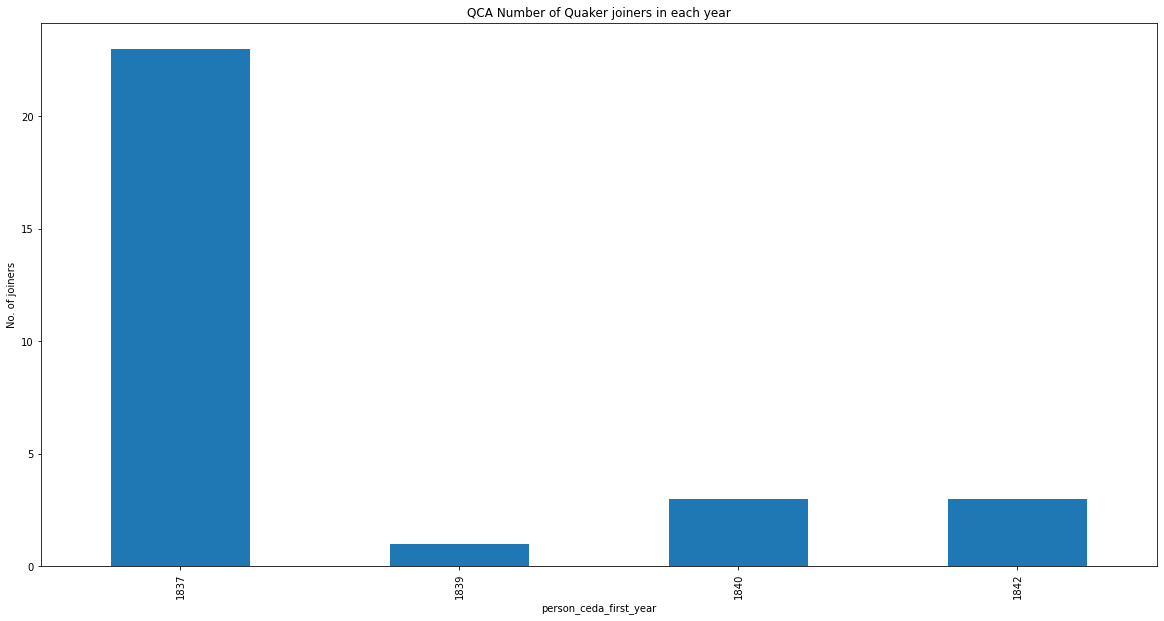

In [57]:
quaker_qca.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("QCA Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

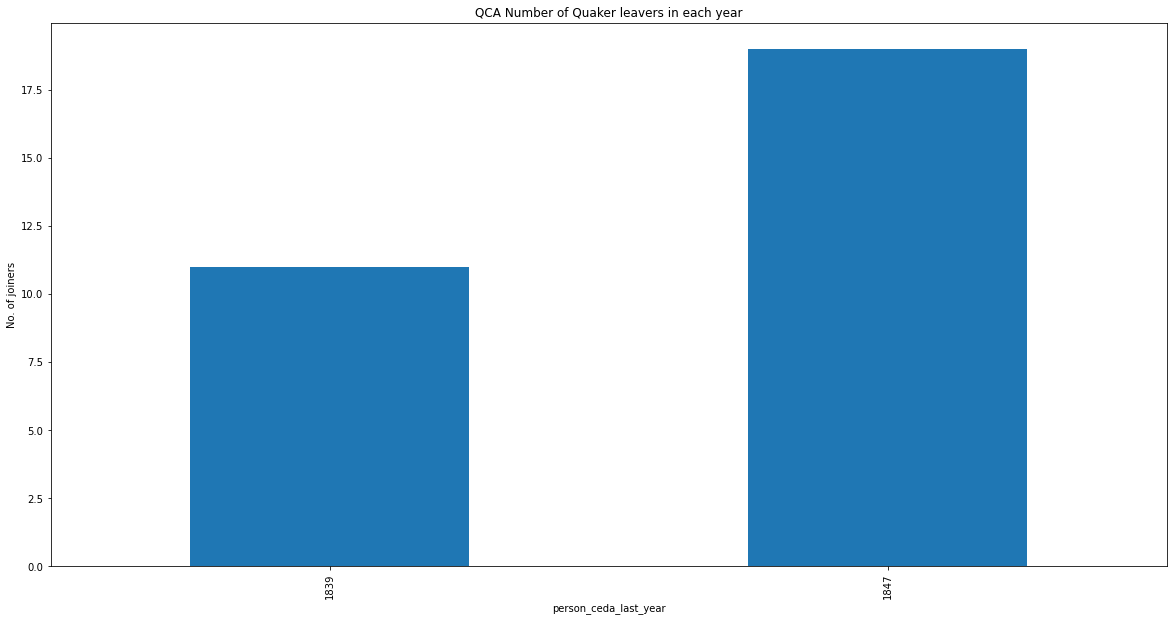

In [58]:
quaker_qca.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("QCA Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# Show the Quaker members of the HOD #

## Note There are no 'first' and 'last' year data for this CEDA ##

In [63]:
quaker_hod

,person_id,Name,religion_id,religion_name,ceda_id,ceda_name
0,2108,E T Wakefield,1,Quaker,7,HOD
1,1744,John Ross,1,Quaker,7,HOD
2,1725,J Robinson,1,Quaker,7,HOD
3,1207,Joseph Lister,1,Quaker,7,HOD
4,967,Thomas (1) Hodgkin,1,Quaker,7,HOD
5,967,Thomas (1) Hodgkin,1,Quaker,7,HOD
6,730,Robert Nicholas Fowler,1,Quaker,7,HOD
7,403,Henry Christy,1,Quaker,7,HOD
8,81,James (1) Backhouse,1,Quaker,7,HOD
9,81,James (1) Backhouse,1,Quaker,7,HOD


# Show the Quaker members of the APS #

## Note Quakers make up roughly half of the members over all years ##

In [22]:
quaker_aps

,person_id,Name,religion_id,religion_name,ceda_id,ceda_name,person_ceda_first_year,person_ceda_last_year
0,2233,William Spicer Wood,1,Quaker,2,APS,1864,1867
1,2211,William Wilson,1,Quaker,2,APS,1838,1865
2,2208,James Wilson,1,Quaker,2,APS,1862,1867
3,2108,E T Wakefield,1,Quaker,2,APS,1853,1864
4,1744,John Ross,1,Quaker,2,APS,1839,1852
...,...,...,...,...,...,...,...,...
571,2876,Joshua Wilson,1,Quaker,2,APS,1860,1860
572,2877,F Woodhead,1,Quaker,2,APS,1861,1862
573,2878,W Woolston,1,Quaker,2,APS,1861,1861
574,2879,Francis Wright,1,Quaker,2,APS,1838,1838


# Pie chart Quaker 'joiners' and 'leavers' of the APS #

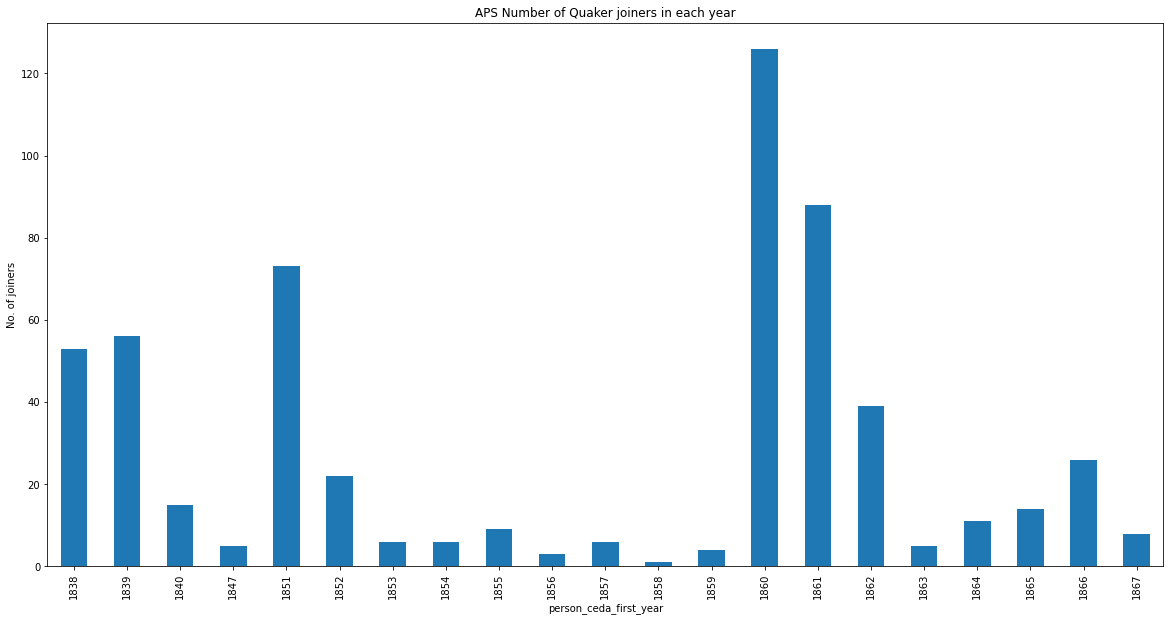

In [24]:
quaker_aps.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("APS Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

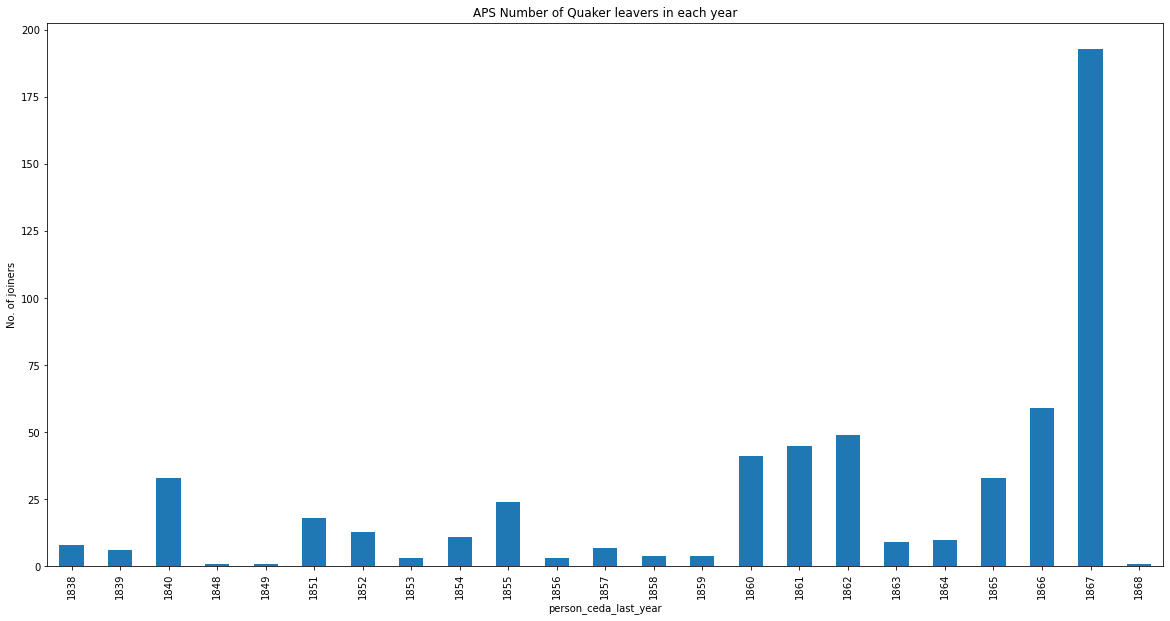

In [25]:
quaker_aps.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("APS Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# Show Quaker members of the ESL #

In [36]:
quaker_esl

,person_id,Name,religion_id,religion_name,ceda_id,ceda_name,person_ceda_first_year,person_ceda_last_year
0,1216,William Horton Lloyd,1,Quaker,3,ESL,1844,1847
1,1207,Joseph Lister,1,Quaker,3,ESL,1844,1847
2,967,Thomas (1) Hodgkin,1,Quaker,3,ESL,1844,1862
3,853,John Henry Gurney,1,Quaker,3,ESL,1860,1867
4,732,Charles Henry Fox,1,Quaker,3,ESL,1861,1871
5,731,William Fowler,1,Quaker,3,ESL,1851,1851
6,730,Robert Nicholas Fowler,1,Quaker,3,ESL,1851,1871
7,523,David Dale,1,Quaker,3,ESL,1860,1863
8,448,x Collier,1,Quaker,3,ESL,1844,1844
9,419,William Clay,1,Quaker,3,ESL,1861,1868


# Show Quaker 'joiners' and 'leavers' of the ESL #

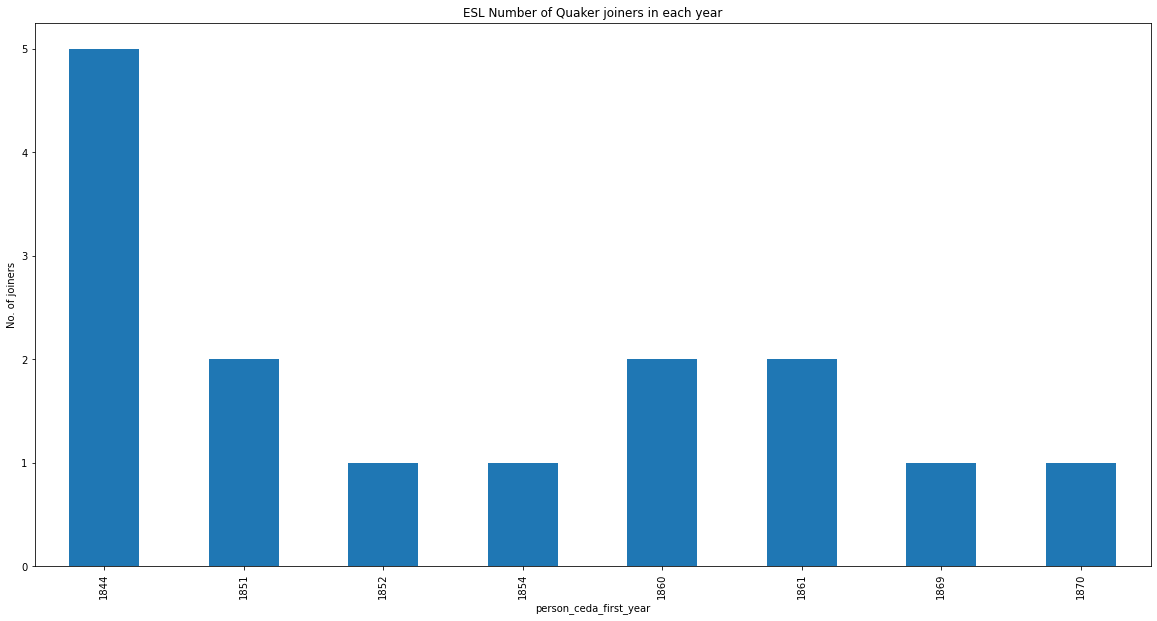

In [38]:
quaker_esl.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("ESL Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

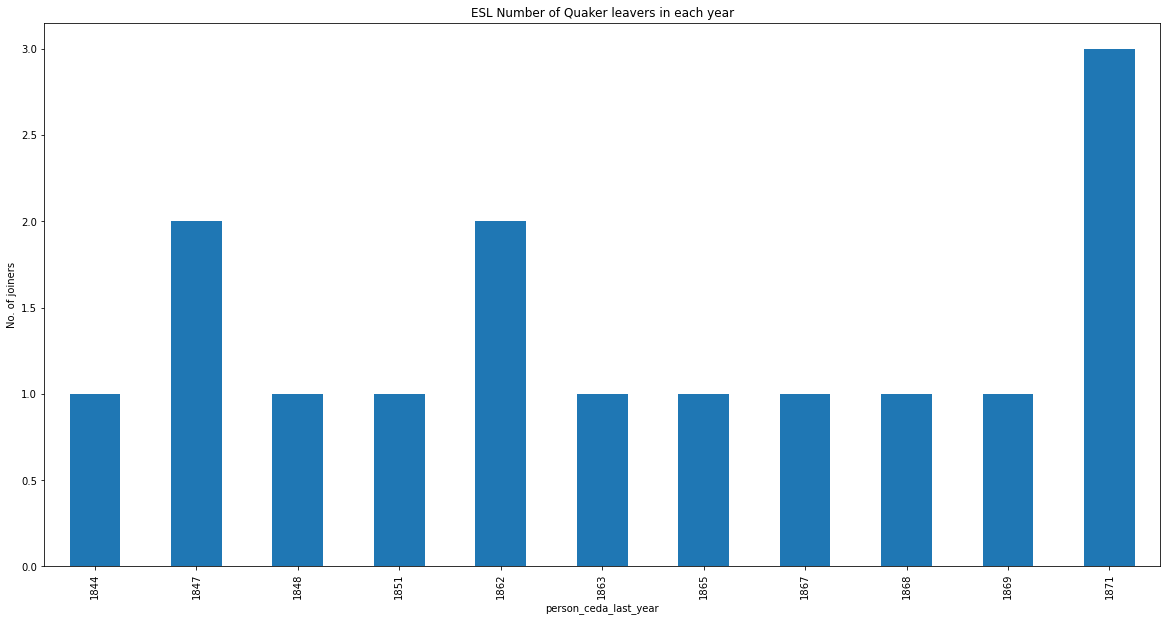

In [39]:
quaker_esl.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("ESL Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# Show Quaker members of the ASL #

In [40]:
quaker_asl

,person_id,Name,religion_id,religion_name,ceda_id,ceda_name,person_ceda_first_year,person_ceda_last_year
0,2233,William Spicer Wood,1,Quaker,4,ASL,1863,1871
1,2211,William Wilson,1,Quaker,4,ASL,1865,1866
2,2208,James Wilson,1,Quaker,4,ASL,1865,1865
3,2108,E T Wakefield,1,Quaker,4,ASL,1865,1868
4,1725,J Robinson,1,Quaker,4,ASL,1865,1865
5,1021,Jonathan Hutchinson,1,Quaker,4,ASL,1863,1871
6,979,William Holmes,1,Quaker,4,ASL,1865,1869
7,776,George Stacey Gibson,1,Quaker,4,ASL,1864,1866
8,600,James T J Doyle,1,Quaker,4,ASL,1865,1868
9,503,Henry Crowley,1,Quaker,4,ASL,1864,1871


# Show quaker 'joiners' and 'leavers' of the ASL #

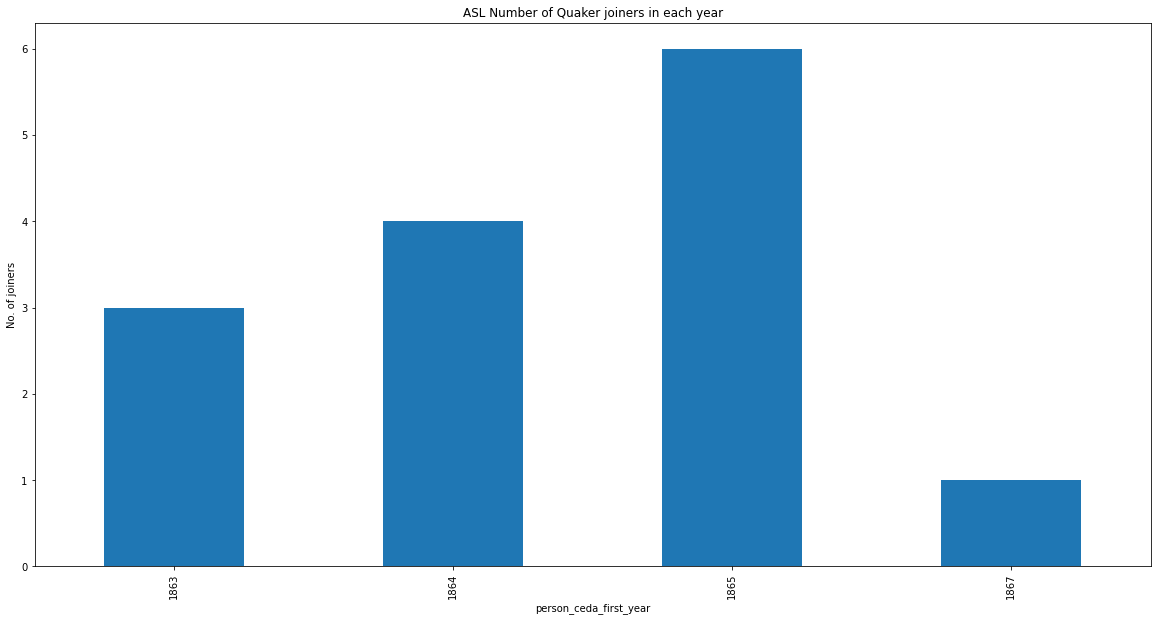

In [41]:
quaker_asl.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("ASL Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

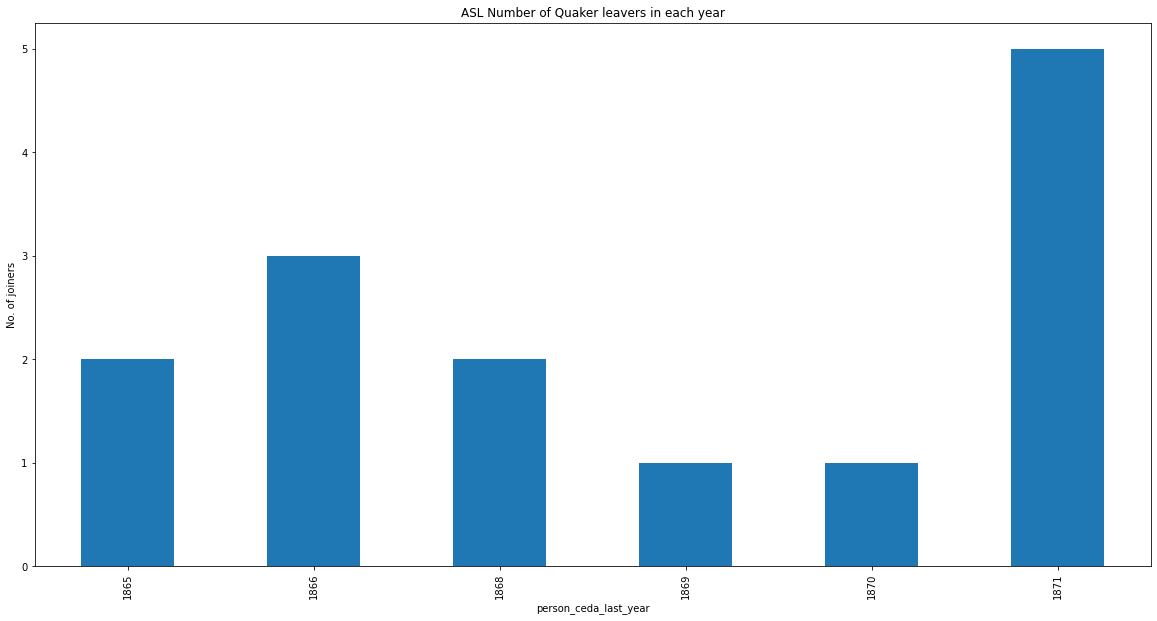

In [45]:
quaker_asl.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("ASL Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# Show Quaker members of the AI #

In [51]:
quaker_ai

,person_id,Name,religion_id,religion_name,ceda_id,ceda_name,person_ceda_first_year,person_ceda_last_year
0,2233,William Spicer Wood,1,Quaker,6,AI,1863,1871
1,1021,Jonathan Hutchinson,1,Quaker,6,AI,1863,1871
2,732,Charles Henry Fox,1,Quaker,6,AI,1861,1871
3,730,Robert Nicholas Fowler,1,Quaker,6,AI,1851,1871
4,503,Henry Crowley,1,Quaker,6,AI,1864,1871
5,303,William Bull,1,Quaker,6,AI,1867,1871
6,249,Antonio Brady,1,Quaker,6,AI,1864,1871
7,80,Edward Backhouse,1,Quaker,6,AI,1870,1871


# show Quaker 'joiners' and 'leavers' of the AI #

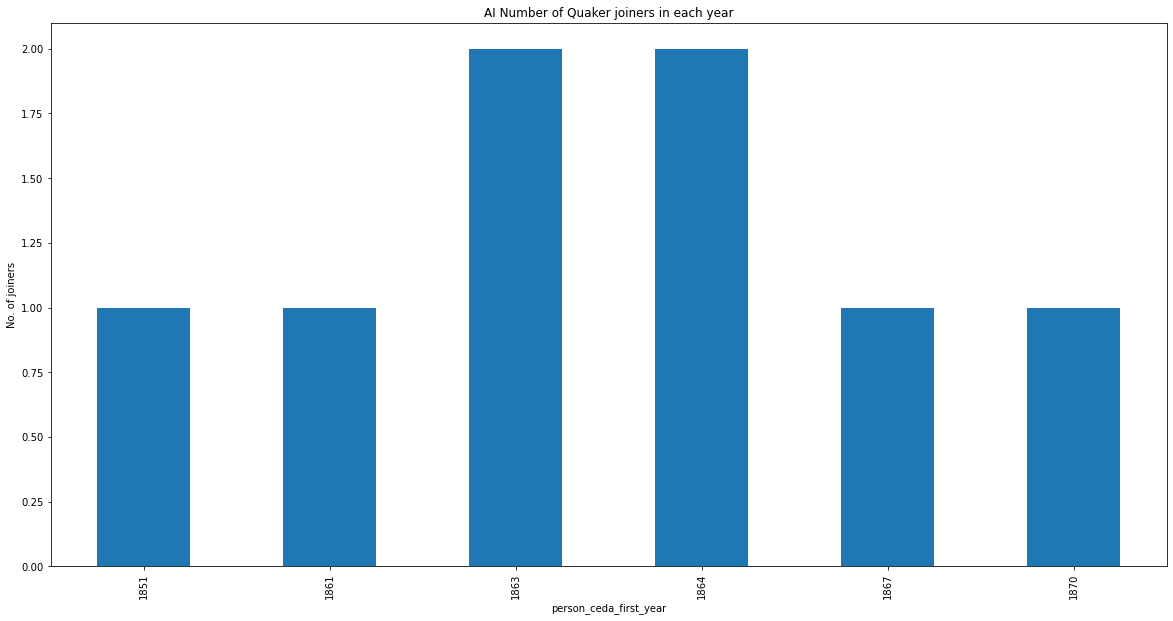

In [52]:
quaker_ai.groupby('person_ceda_first_year')['Name'].nunique().plot(kind='bar')
plt.title ("AI Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

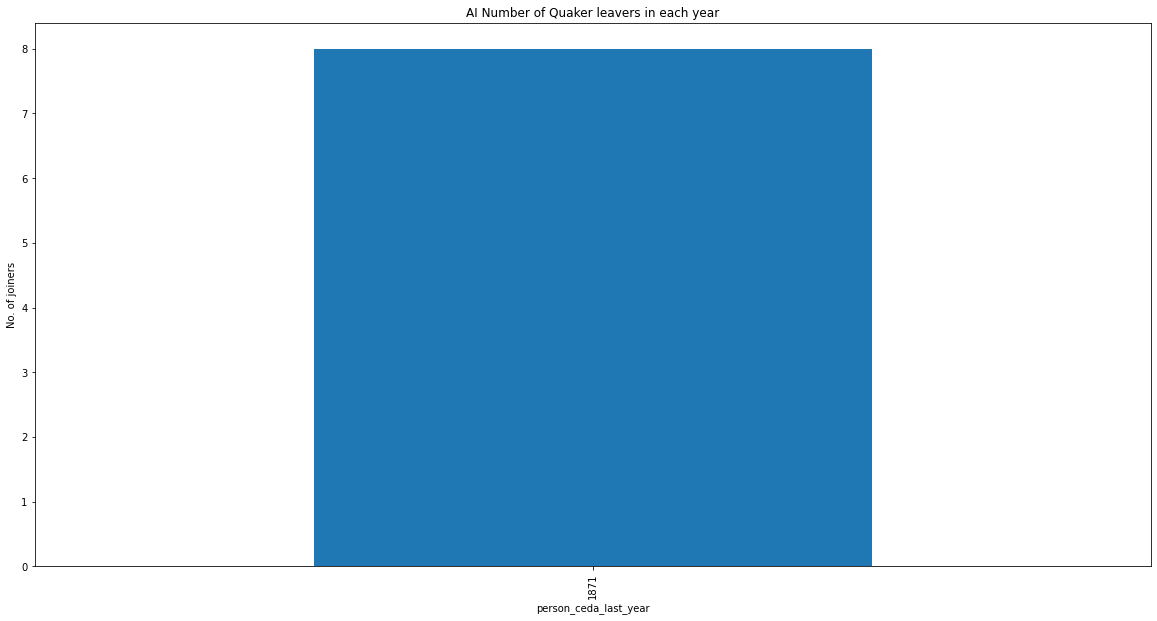

In [54]:
quaker_ai.groupby('person_ceda_last_year')['Name'].nunique().plot(kind='bar')
plt.title ("AI Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# END #